In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib notebook

In [193]:
excel_data_df = pd.read_excel('Case_Data.xlsx', sheet_name = 'Salgshistorikk', dtype = str)
print(excel_data_df.columns.ravel())
excel_data_df

['Id' 'Modell' 'Selger' 'Kjøper' 'Kjøpertype' 'Drivstoff' 'Type bil'
 'Innkjøpspris' 'Utsalgspris' 'Avgifter' 'Dato']


,Id,Modell,Selger,Kjøper,Kjøpertype,Drivstoff,Type bil,Innkjøpspris,Utsalgspris,Avgifter,Dato
0,1,Phantum,Are,Per,Barnefamilie,El,SUV,550000,600000,0,2020-01-02 00:00:00
1,2,Fiet,Are,Ole og Kari,Kjærestepar,El,To-seter,180000,200000,0,2020-01-11 00:00:00
2,3,Fiet,Chris,Eva,Enslig kvinne,El,To-seter,180000,200000,0,2020-01-11 00:00:00
3,4,Phantum,Dina,Carl,Enslig mann,El,SUV,550000,600000,0,2020-01-24 00:00:00
4,5,Bius,Berit,Ina og Torstein,Barnefamilie,Bensin,Stasjonsvogn,200000,300000,50000,2020-01-25 00:00:00
5,6,Phantum,Are,Bella og Betine,Kjærestepar,El,SUV,550000,600000,0,2020-02-07 00:00:00
6,7,Fiet,Dina,Marianne,Enslig kvinne,El,To-seter,180000,200000,0,2020-02-14 00:00:00
7,8,Phantum,Chris,Geir,Kjærestepar,El,SUV,550000,600000,0,2020-02-21 00:00:00
8,9,Phantum,Dina,Sunniva,Kjærestepar,El,SUV,550000,600000,0,2020-02-28 00:00:00
9,10,Modus,Chris,Karl,Barnefamilie,Diesel,Stasjonsvogn,150000,300000,50000,2020-03-06 00:00:00


In [242]:
Ints = np.array(['Id', 'Innkjøpspris', 'Utsalgspris', 'Avgifter'])

def get_months(arr):
    months = np.zeros(len(arr), dtype = np.int64)
    for i in range(len(arr)):
        date = arr[i]
        months[i] = date[5:7]
    return months

def hashtable(key_type, key, item_type):
    if not np.isin(key_type, excel_data_df.columns.ravel()) or not np.isin(item_type, excel_data_df.columns.ravel()):
        print("Invalid key_type or item_type. Valid types are:", excel_data_df.columns.ravel())
        return
    
    if np.isin(key_type, Ints):
        ind = np.where(excel_data_df[key_type].astype(np.int64) == key)[0]
    elif key_type != 'Dato':
        ind = np.where(excel_data_df[key_type] == key)[0]
    else:
        ind = np.where(get_months(np.array(excel_data_df[key_type], dtype = str)) == key)[0]
    
    if np.isin(item_type, Ints):
        return np.array(excel_data_df[item_type][ind].astype(np.int64))
    elif item_type != 'Dato':
        return np.array(excel_data_df[item_type][ind])
    else:
        return get_months(np.array(excel_data_df[item_type][ind], dtype = str))
    
def occurences(col1, col2):
    if col1 != 'Dato':
        items1 = np.unique(excel_data_df[col1])
    else:
        items1 = np.unique(get_months(excel_data_df[col1]))
    if col2 != 'Dato':
        items2 = np.unique(excel_data_df[col2])
    else:
        items2 = get_months(excel_data_df[col2])
        
    counts = np.zeros([len(items1), len(items2)])
    for i in range(len(items1)):
        arr = hashtable(col1, items1[i], col2)
        for j in range(len(arr)):
            counts[i, np.where(items2 == arr[j])] += 1
    return counts, items1, items2

def hashtable_months(key_type, key, item_type, month):
    if not np.isin(key_type, excel_data_df.columns.ravel()) or not np.isin(item_type, excel_data_df.columns.ravel()):
        print("Invalid key_type or item_type. Valid types are:", excel_data_df.columns.ravel())
        return
    
    if np.isin(key_type, Ints):
        ind1 = np.where(excel_data_df[key_type].astype(np.int64) == key)[0]
    else:
        ind1 = np.where(excel_data_df[key_type] == key)[0]
    ind2 = np.where(get_months(np.array(excel_data_df['Dato'], dtype = str)) == month)[0]
    ind = np.intersect1d(ind1, ind2)
    
    if np.isin(item_type, Ints):
        return np.array(excel_data_df[item_type][ind].astype(np.int64))
    else:
        return np.array(excel_data_df[item_type][ind])
    
def profit(col1, monthly = False):
    items1 = np.unique(excel_data_df[col1])
    if not monthly:
        profits = np.zeros([len(items1)])
        for i in range(len(items1)):
            utsalg = np.sum(hashtable(col1, items1[i], 'Utsalgspris'))
            innkjøp = np.sum(hashtable(col1, items1[i], 'Innkjøpspris'))
            avgift = np.sum(hashtable(col1, items1[i], 'Avgifter'))
            profits[i] = utsalg - innkjøp - avgift
            
    else:
        profits = np.zeros([len(items1), 12])
        for i in range(len(items1)):
            for j in range(12):
                utsalg = np.sum(hashtable_months(col1, items1[i], 'Utsalgspris', j+1))
                innkjøp = np.sum(hashtable_months(col1, items1[i], 'Innkjøpspris', j+1))
                avgift = np.sum(hashtable_months(col1, items1[i], 'Avgifter', j+1))
                profits[i,j] = utsalg - innkjøp - avgift
                
    return profits, items1

def analyze(col1, col2, profits = False, monthly = False):
    if not profits:
        data, axis1, axis2 = occurences(col1, col2)
        plt.title(col1 + " vs " + col2)
        plt.xlabel(col2)
        plt.ylabel("Forekomster")
        for i in range(len(axis1)):
            plt.plot(axis2, data[i], "--o", label = axis1[i])
        plt.legend()
        
    else:
        plt.ylabel("Profit")
        plt.title("Profit of " + col1)
        if not monthly:
            data, axis1 = profit(col1, monthly)
            plt.xlabel(col1)
            plt.plot(axis1, data, "o")
        else:
            data, axis1 = profit(col1, monthly)
            plt.xlabel('Dato')
            for i in range(len(axis1)):
                plt.plot(np.arange(12)+1, data[i], "--o", label = axis1[i])
            plt.legend()
            plt.plot()
    plt.show()

<IPython.core.display.Javascript object>


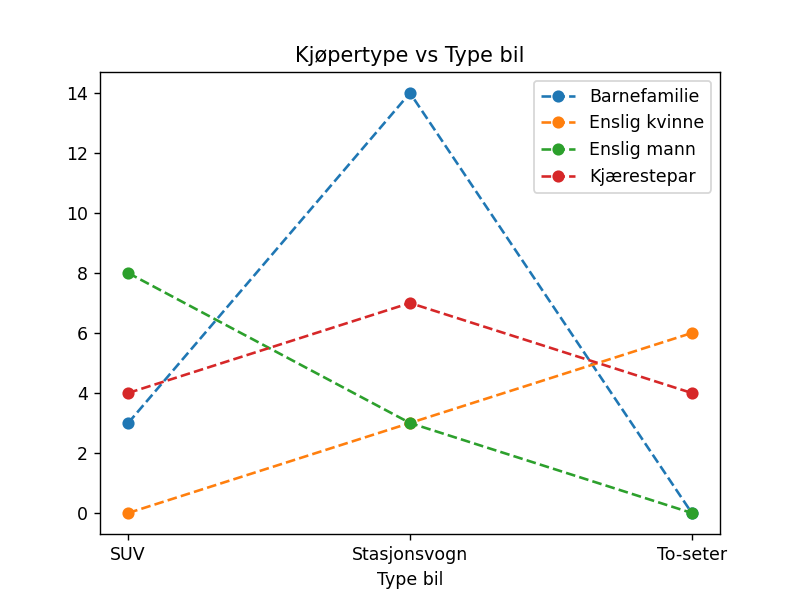

In [203]:
analyze('Kjøpertype', 'Type bil')

<IPython.core.display.Javascript object>


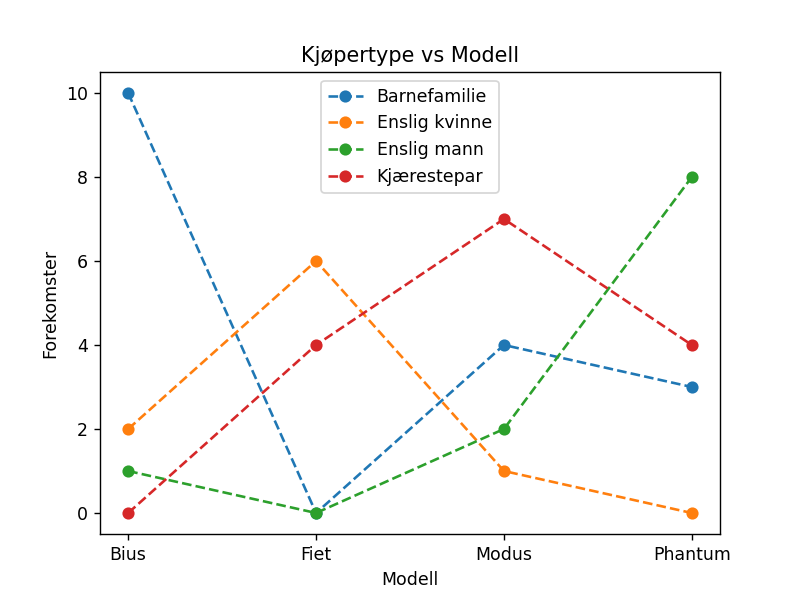

In [205]:
analyze('Kjøpertype', 'Modell')

<IPython.core.display.Javascript object>


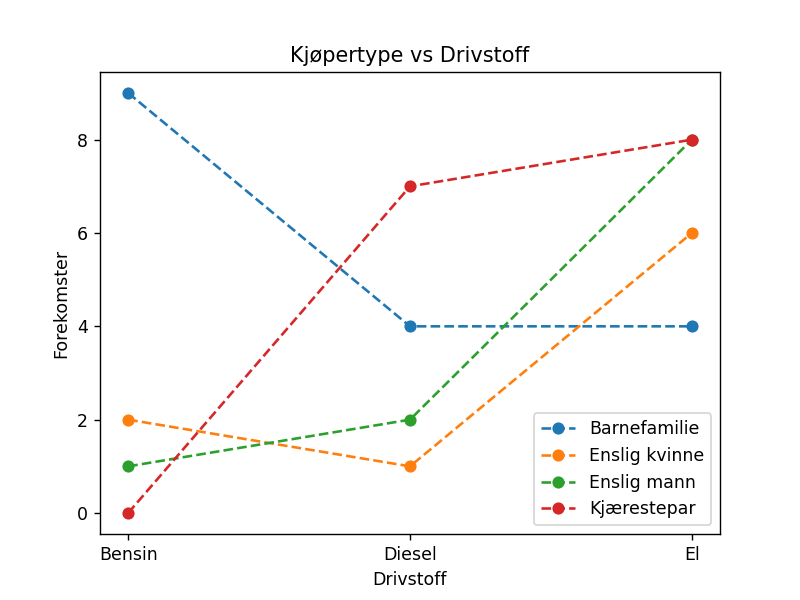

In [206]:
analyze('Kjøpertype', 'Drivstoff')

<IPython.core.display.Javascript object>


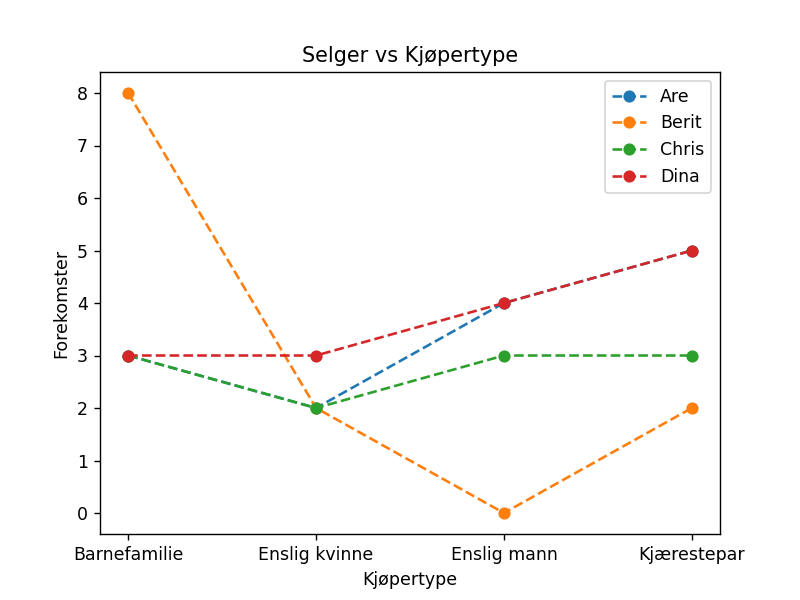

In [207]:
analyze('Selger', 'Kjøpertype')

In [208]:
analyze('Selger', 'Modell')

<IPython.core.display.Javascript object>

In [209]:
analyze('Selger', 'Drivstoff')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>


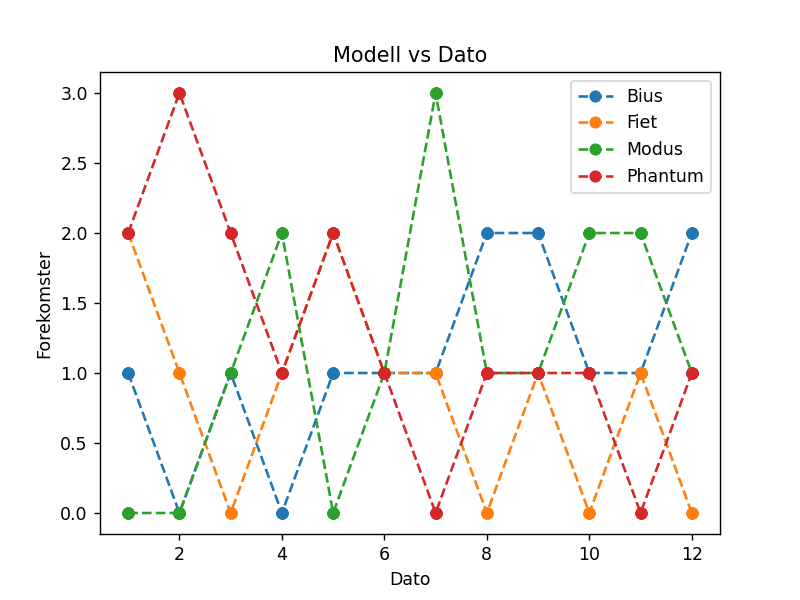

In [255]:
analyze('Modell', 'Dato')

<IPython.core.display.Javascript object>


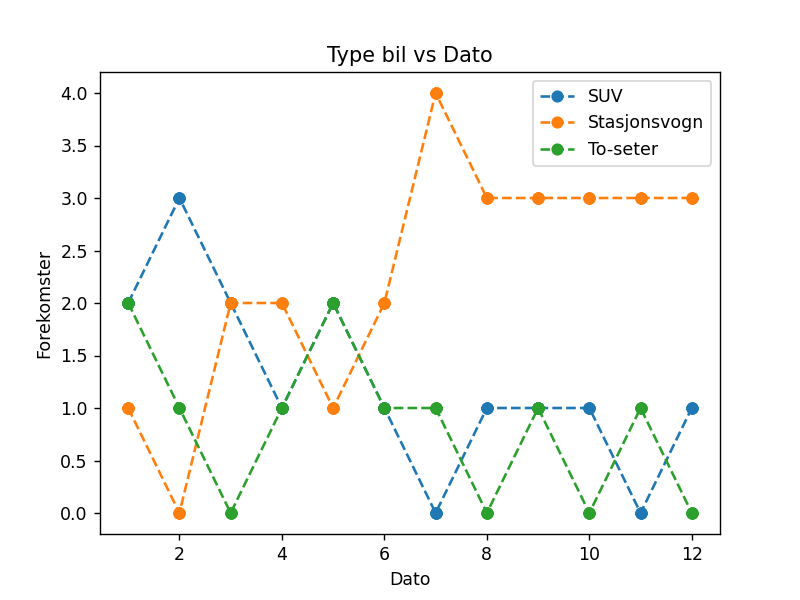

In [254]:
analyze('Type bil', 'Dato')

<IPython.core.display.Javascript object>


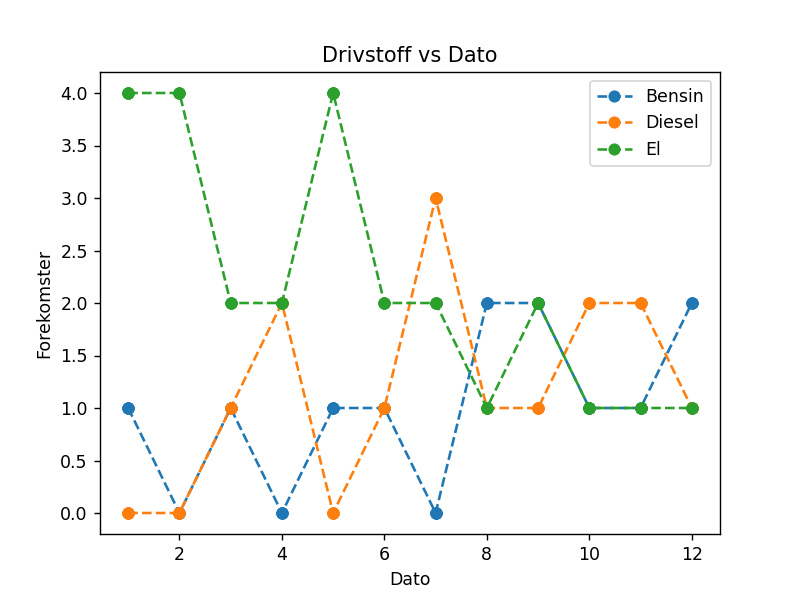

In [246]:
analyze('Drivstoff', 'Dato')

<IPython.core.display.Javascript object>


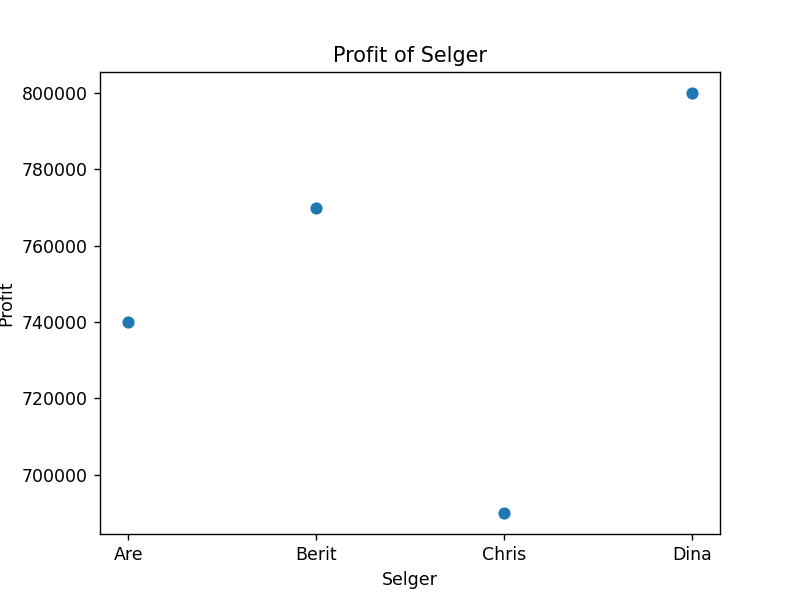

In [238]:
analyze('Selger', None, True)

<IPython.core.display.Javascript object>


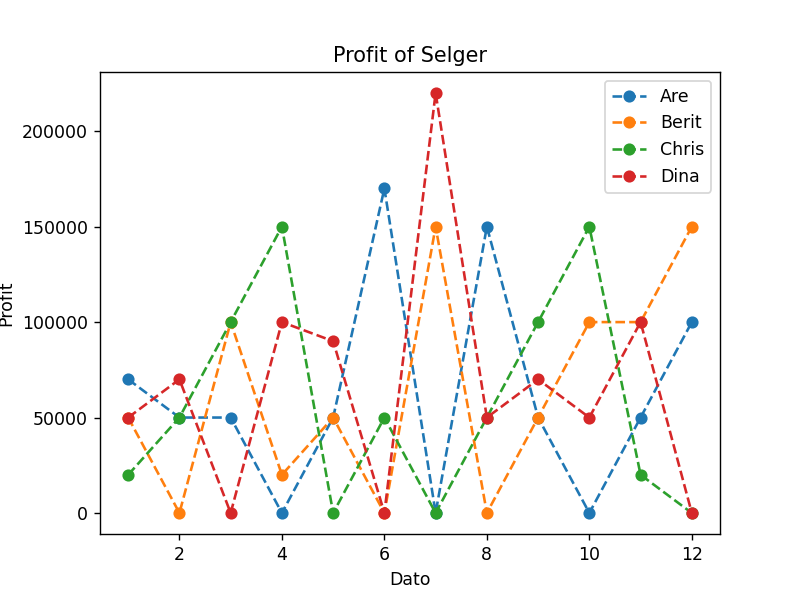

In [243]:
analyze('Selger', None, True, True)

<IPython.core.display.Javascript object>


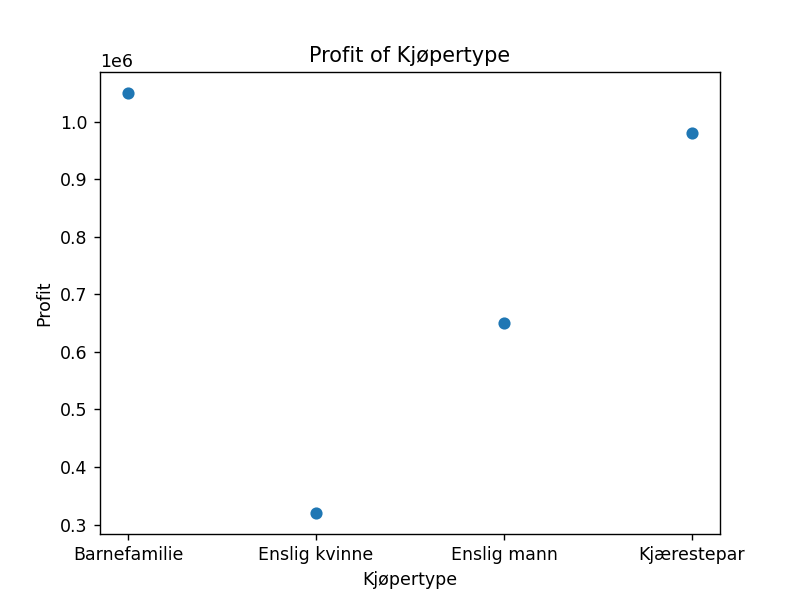

In [244]:
analyze('Kjøpertype', None, True)

<IPython.core.display.Javascript object>


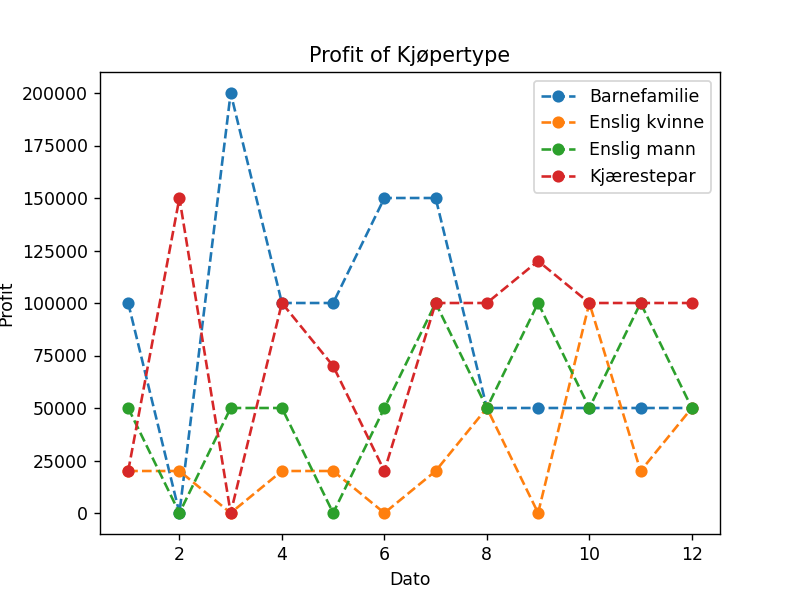

In [245]:
analyze('Kjøpertype', None, True, True)

<IPython.core.display.Javascript object>


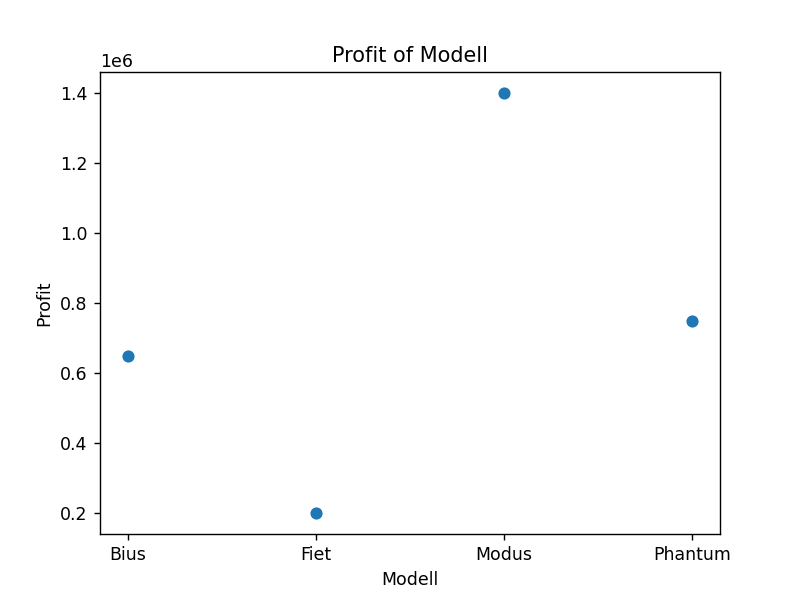

In [247]:
analyze('Modell', None, True)

<IPython.core.display.Javascript object>


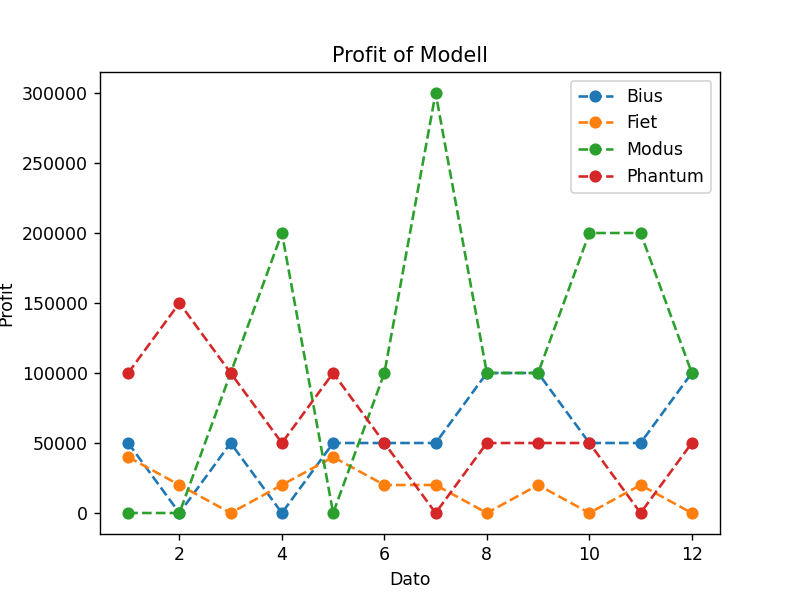

In [248]:
analyze('Modell', None, True, True)

<IPython.core.display.Javascript object>


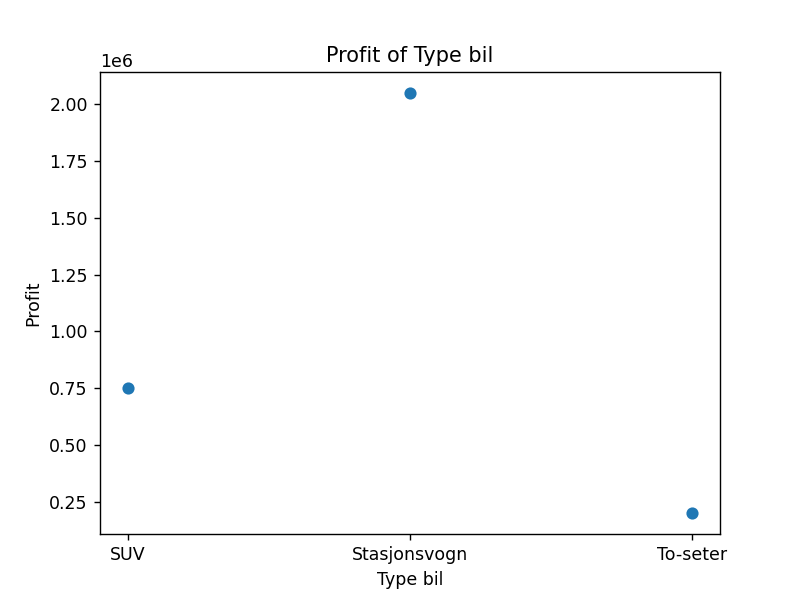

In [249]:
analyze('Type bil', None, True)

<IPython.core.display.Javascript object>


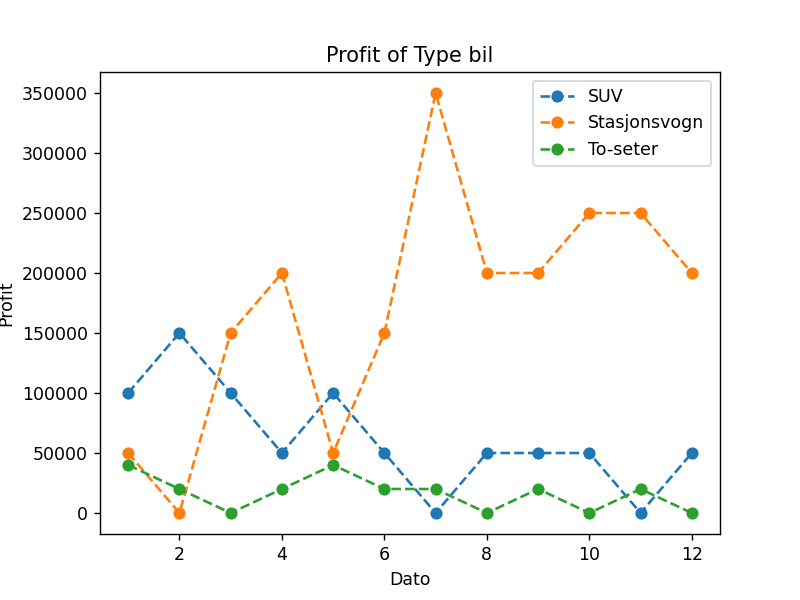

In [250]:
analyze('Type bil', None, True, True)

<IPython.core.display.Javascript object>


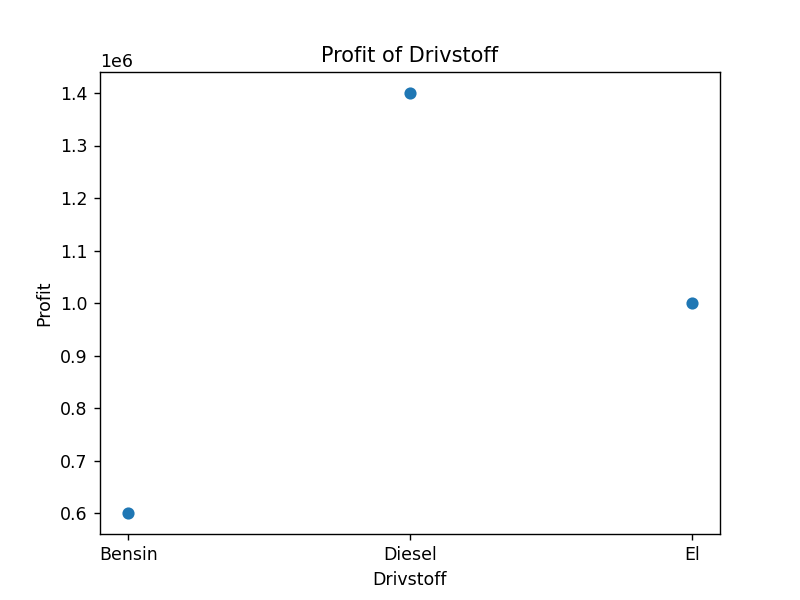

In [251]:
analyze('Drivstoff', None, True)

<IPython.core.display.Javascript object>


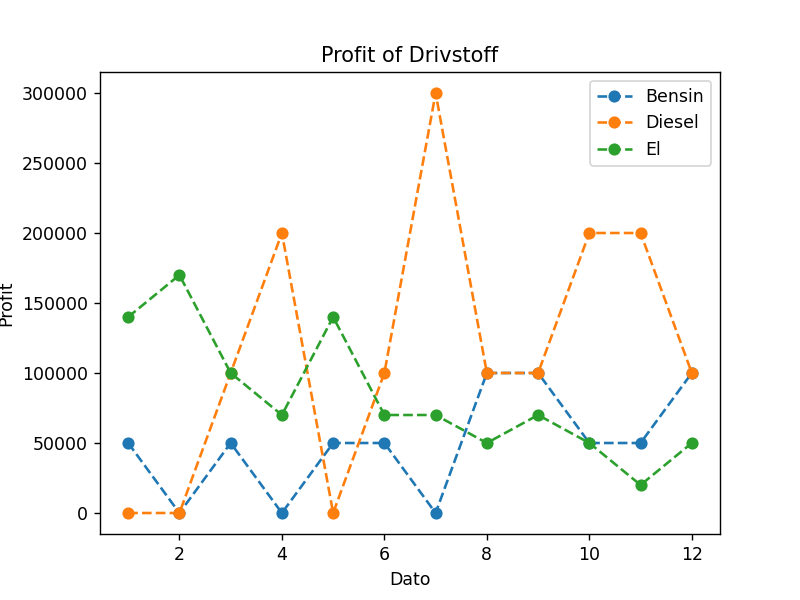

In [252]:
analyze('Drivstoff', None, True, True)